# Overview

A few weeks ago we talked about Karl Popper's approach to science and noted that significance testing is pretty similar. Both put the emphasis on rejecting bad theories but don't seem too interested in confirming or identifying the true theories. Moreover, they don't have any way of saying which theories are most likely to be true.

This is disappointing. Don't we want to know which of our theories is the best one? Giving up on any sense of ranking between undefeated theories is a big cost. Imagine we're climate scientists. We develop a big batch of climate models based on various theories. Then we do as Popper suggests and start eliminating them. After a while, we have two climate models left. One of them says everything in the near future will be fine. The other predicts catastrophic climate change. 

Now governments are consulting with us about infrastructure, energy and disaster policy. They want to know which model is more credible. But if Popper's right, we cannot answer this question. All we can say is that these two model both stand unrefuted. The government officials leave and so does our funding. Science that can't rationally inform predictions may not be worth pursuing.

Today, we'll explore Bayesian statistics, an approach that can avoid the problem of rational prediction. For the most part, I think Bayesian statistics is a big improvement over significance testing. It can make good predictions, it's simpler, it's logically very elegant, it's more informative. These benefits come at two small costs. First, it requires even more assumptions, assumptions that some worry introduce too much subjectivity. Second, it's computationally intensive. We'll work on problems where you computer will just hum for 2 minutes before finding the solution.

Today, we'll just introduce the mathematics, work through a couple problems, turn to posterior distributions and spend the whole class just exploring how they work. Next time, we'll turn to some the philosophical advantages and criticisms of the approach alongside a couple of more complex problems.




# Bayes Theorem

One point I've tried to emphasize in discussing p-values is that they do not tell you the probability your hypothesis is true. They just tell you the probability of the data given the hypothesis, or $P(E|H)$. This feels disastifying. What we really want to know is how good our hypothesis is, or $P(H|E)$. This isn't a small complaint. Unless we have a way to measure $P(H|E)$, it seems hard for science to progress toward the truth. Surely, there must be a way to infer how probable a hypothesis is from how probable the data are!









## Likelihoods are not posteriors

Unfortunately, the relationship is not straightforward. Here is a simple example to prime your intuition. Suppose you're complaining to your friend about how rainy it's been lately. Your friend replies, "well, it is March after all." Your friend has just done a tiny bit of science - they are trying to explain the rain with reference to the fact it's March. 

Let's assign some variables: 

- H - It's raining in Vancouver
- E - It's March

It rains most days in March - 20 out of 30, in the average year. So the probability that it's raining in Vancouver, given that it's March ($P(H|E)$) is $\frac{20}{30}$ or $\frac{2}{3}$. 

By contrast $P(E|H)$, the probability that it's March given that it is raining, is low. It also rains a lot in other months. First, of all there are 12 of them. Second, the winter months are extremely rainy also. So if you only knew that it's raining, it wouldn't give you very compelling evidence that the month was November. So the two terms are not not equal.

$$ P(H|E) \neq P(E|H) $$

Despite not being equal, we should think they are proportional. As your hypothesis does a better and better job predicting the data (i.e. as $P(E|H)$ goes up), that seems to suggest your hypothesis is more likely to be true. Take just the extreme cases. If your hypothesis always predicts how the data should look, you would start to think your hypothesis is right. If your hypothesis never gets the data right, you should think it's wrong. So they should be proportional but not equal. We need to find some more components that moderate this relationship so we get the right numbers. 



## The actual theorem

There is a theorem of probability that does just this. If we multiply and divide the $P(E|H)$ term by two other numbers, we get the right relationship. The 3blue1brown video does a good job of unpacking the theorem and providing some motivation for it. I'll let you turn to that video if you haven't done so already.

$$ P(H|E) = P(H) \frac{P(E|H)}{P(E)} $$

## Bayes theorem as a learning algorithm

Bayes theorem is tremendously important to modern science so you'll want to get an intuition for it another of different ways. The video emphasizes visual techniques for intuitions. A second way to get an intuition for the rule is to interpret it as a kind of learning process. Suppose you have some idea - that it's raining right now. You aren't sure your idea is right but you have some confidence in it. If you are really confidence, we'll say $P(H) \approx 1$. If you are totally unsure, we'll say $P(H) \approx \frac{1}{2}$. If you really doubt your idea is right we'll say $P(H) \approx 0$. It doesn't particularly matter where you start your confidence. But we call this initial level of confidence a *prior*.

Now you get some bit of evidence for the idea - someone reminds you it's March. What should your confidence in your idea be after learning the evidence be? That is represented by $P(H|E)$. We call this number a *posterior*. The posterior is usually what we are trying to find in science.

To find your new level of confidence, you take the old level of confidence and multiply it by the ratio $\frac{P(E|H)}{P(E)}$. The top number represent the probability of the evidence, given your hypothesis. You've seen this plenty of times already. It's same the number we find when we calculate p-values. You can use techniques like the binomial theorem or the normal distribution to find it. We'll call it the *likelihood*. 

The bottom number represents a kind of baseline probability for finding the evidence, with or without the hypothesis. We'll call it the *expectation*. When this ratio is greater than one, your confidence should grow. When the ratio is less than one, your confidence should shrink. The intuition is that when the hypothesis says the evidence should show up more often than you would normally anticipate the evidence, the hypothesis must be onto something.

## The Law of Total Probability

In practice, we rarely can find the expectation directly. We would have to know how often events like the evidence show up *in general*. Instead, we use the law of total probability to find the expectation. The law says the probability of one event is equal to a weighted average of all the possible ways for that event to happen. The video employs the simple law of total probability where there are two possible scenarios. But suppose there are $n$ different ways for the event to happen, then the average probability of the event is:

$$ P(E) = \sum_{i=1}^{n} P(E|H_i)P(H_i) $$

Each scenario for producing the event is an $i$. On a given scenario, we want to know how often that scenario comes up $P(H_i)$ and the probability of the event, given the scenario, or $P(E|H_i)$. Suppose I want to know how often it rains. One way to discover that is to count the number of days of rain in a year and divide by 365. But another way is to count the number of days it rains in each month, divide by 30 or 31, add up the frequencies from each month and divide by 12. They both get you to the same place.

What's clever about this approach is that we only need to know two kinds of terms - priors and likelihoods. The downside is that we'll need to work through a lot of prior/likelihood combinations to find our answers. But that's what computers are for.

The law of total probability gives us a new way to interpret Bayes theorem. If that last section didn't make sense, maybe this will. Let's say the likelihood, $P(E|H)$, is a measure of how good a hypothesis is. The ratio is bigger than 1 whenever the likelihood is better than the average likelihood. Now all Bayes theorem says is that hypotheses that are better than the average hypothesis should grow in probability.

## Check your understanding



### Steve

*Suppose there is a village with 200 people. 20 of them are librarians. 180 of them are farmers. People in the village have one of two types of souls. Some people have a meek and tidy soul. Other people have an industrious and outgoing soul. 40% of librarians have a meek and tidy soul. 10% of farmers have meek and tidy souls.*

*Now consider Steve. We know he has a meek and tidy soul. What's the probability he is a librarian?*

#### Hide this

In [1]:
# p(meek and tidy soul | librarian) = p(e|h)
# p(meek and tidy soul) = p(e)
# p(steve is a librarian) = p(h)
# p(steve is a librarian | meek and tidy soul) = p(h|e)

prior = 20 / 200
likelihood = 0.4
expectation = (0.4 * 20 / 200) + (0.1 * 180 / 200)

prior * likelihood / expectation

0.13

### Cab example

*A cab was involved in a hit and run accident at night. Two cab companies, the Green and the Blue, operate in the city. You are given the following data:*

*$85\%$ of the cabs in the city are Green and $15\%$ are Blue.
A witness identified the cab as Blue. The court tested the reliability of the witness under the same circumstances that existed on the night of the accident and concluded that the witness correctly identified each one of the two colors $80\%$ of the time and failed $20\%$ of the time.*

*What is the probability that the cab involved in the accident was blue rather green?*

#### Hide this

In [2]:
# p(h|e) = p(blue car involved in the accident | witness says the cab is blue)
# p(h) = p(blue car involved)
# p(e | h) = p(witness says the cab is blue | the blue car was involved)
# p(e) = p(witness says the cab is blue)

prior_blue = 0.15
likelihood_blue = 0.8

prior_green = 0.85
likelihood_green = 0.2

# scenario 1 - the car is actually blue
# sceario 2 - the car is actually green

expectation = (prior_blue * likelihood_blue) + (prior_green * likelihood_green)

prior_blue * likelihood_blue / expectation

0.4137931034482758

### Christmas day at sea

>It is Christmas Day and you are sailing in the North Atlantic. You observe that the barometer is falling more than 1mb per
hour, so you are a bit worried that a storm is coming. According to the best available meteorological data, the probability that the barometer falls more than 1mb per hour given that a storm is coming is 0.95. The probability that it falls more than 1mb per hour given that a storm is not coming, however, is just 1 in 1,000. Furthermore, the probability that there
is a storm in the North Atlantic any given day in December is 0.25. What is the probability that a storm is coming given that the barometer falls more than 1mb per hour?

In [ ]:
# write your answer here:

#### Hide this

In [ ]:
# Posterior? - p(storm|barometer falling) = ?
# likelihood - p(barometer falling|storm) = 0.95
# likelihood - p(barometer falling|no storm) = .001
# prior - p(storm) = 0.25

likelihood_1 = 0.95
likelihood_2 = 0.001
prior_1 = 0.25
prior_2 = 0.75

likelihood_1 * prior_1 / (likelihood_1 * prior_1 + likelihood_2 * prior_2)

0.9968520461699895

### Three hypotheses

*Suppose there is a village with 200 people. 20 of them are librarians. 140 of them are farmers. 40 of them are cooks. People in the village have one of two types of souls. Some people have a meek and tidy soul. Other people have an industrious and outgoing soul. 40% of librarians have a meek and tidy soul. 10% of farmers have meek and tidy souls. 20% of cooks have meek and tidy souls.*

*Now consider Steve. We know he has a meek and tidy soul. What's the probability he is a librarian?*

#### Hide this

In [ ]:
prior_librarian = 20 / 200
likelihood_librarian = 0.4

prior_cook = 40 / 200
likelihood_cook = 0.2

prior_farmer = 140 / 200
likelihood_farmer = 0.1

prior_librarian * likelihood_librarian / (prior_librarian * likelihood_librarian + 
                                          prior_cook * likelihood_cook + 
                                          prior_farmer * likelihood_farmer)

# Posterior distributions

In the last section, we tried to find the probability of just one hypothesis. This makes sense given the kinds of hypotheses we were looking at - a storm is either coming or it's not, it's either raining or it's not. But most scientific problems are not like that. There numerous possibilities. So our goal is to find a distribution of probabilities over the set of possible hypotheses. This tells us how good each hypothesis relative to all the others. 

Suppose I want to know what percent of Earth's surface is water. I might try to carefully measure the areas of each ocean. But that's hard. The oceans are not nice shapes with known area formula. Instead, I might try Bayesian estimation. I toss the globe up and down. Every time I catch the globe, I write down whether my thumb is on the water or the land. I throw the globe 9 times. I find 6 counts of water and 3 counts of land. 

We'll try solving this problem in a number of ways and slowly work out way up to nice computing tricks for finding posterior distributing. The first thing to notice is that this is problem well represented by the binomial distribution. There are two outcomes, water and land. Each trial has the same probability of turning up water or land. We've already learned we can use the binomial distribution to find $P(E|H)$. We did that when calculating p-values last week.

Let's suppose my hypothesis is that the earth is 50% water. Let's remind ourselves how we calculate likelihoods from the binomial distribution.

In [4]:
# packages we'll need

import numpy as np
import matplotlib.pyplot as plt

def simulate_bristol(a,n):
    '''Returns a list of 0s and 1s of lengeth n
    with 0 indicating failure and 1 indicating success.
    
    a = accuracy on each cup
    n = the number of cups'''

    experiment = []

    for i in range(n):
        
        outcome = np.random.choice([1,0],p=[a,1-a])
        experiment.append(outcome)
        
    return experiment

def run_experiments(a,n,precision):
    '''Returns a list containing the number of cups lady bristol
    guessed correctly over many experiments
    
    a = accuracy on each cup
    n = number of cups per experiment
    precision = the number of experiments'''
    
    
    all_trials = []

    for i in range(precision):

        correct = sum(simulate_bristol(a,n))
        all_trials.append(correct)

    return all_trials

In [5]:
# our binomial distribution code
# from the lady tasting tea problem

a = 0.5
n = 9
k = 6
precision = 10000

all_trials = run_experiments(a,n,precision)
matches = all_trials.count(k)
prob = matches / precision
prob

0.1654

This is a good start. But we have a lot of unknown terms.
 
$$ P(H|E) = P(H) \frac{0.164}{\sum_{i=1}^{n} P(E|H_i)P(H_i)} $$

To find them, we need to imagine at least one other hypothesis. When we have multiple hypotheses, we can use our law of total probability trick to the denominator. So let's say $H_2$ - the earth is 60% water. We can easily find the likelihood with the same process: 

In [ ]:
a = 0.6 # this is the key change
n = 9
k = 6
precision = 10000

all_trials = run_experiments(a,n,precision)
matches = all_trials.count(k)
prob = matches / precision
prob

0.25

We'll also need to assign prior probabilities to each hypothesis. We'll have a lot to say about how to assign priors shortly, but let's just assign equal probability to each option.

- $P(H_1) = \frac{1}{2}$

- $P(H_2) = \frac{1}{2}$

Now we can solve Bayes theorem for the posterior of each hypothesis.

$$ P(H_1|E) = P(H_1) \frac{P(E|H_1)}{P(H_1)P(E|H_1) + P(H_2)P(E|H_2)} $$

Plugging in our numbers

$$ P(H_1|E) = 0.5 \frac{0.164}{0.5*0.164+0.5*0.25} $$

$$ P(H_1|E) = \frac{0.082}{0.082 + 0.125} $$

$$ P(H_1|E) = \frac{0.082}{0.207} $$

$$ P(H_1|E) = 0.39 $$

When there are only two hypotheses, the posterior for the other hypothesis is just $1 - P(H_1|E)$ or 0.61. So the conclusion of our analysis is there is 39% chance the earth is 50% water and a 61% chance that the earth is 60% water. 



## Likelihood function

We are going to be calculating a lot of likelihoods at this point in the class. So let's wrap out likelihood code into a function to make computations clearer as we get further along.

In [6]:
def likelihood_tea(a,n,k,precision):
    '''
    Compute the likelihood of getting k successes out of n
    trials assuming probability of success a on each trial.


    a = accuracy
    n = total number of trials
    k = the number of successes
    precision = the number of simulated experiments used to estimate
    the likelihood'''

    all_trials = run_experiments(a,n,precision)
    matches = all_trials.count(k)
    prob = matches / precision

    return prob


likelihood_tea(0.5,9,6,10000)

0.1633

## Generalizing to many hypotheses

This result makes sense in one respect. Our sample was $\frac{2}{3}$ water, so we should think that the 60% water hypothesis should do better than the 50% water hypothesis. But it doesn't matter sense in another. These numbers seem too high. Surely, we should not be *that* confidence that the earth is 60% water. If I remember my elementary school science, the number should be closer to 70% water. The problem is that we didn't test enough hypotheses. So we need to generalize this approach to more hypotheses. Let's try 10 hypotheses: every 10% increment from 10% to 100% of the world covered in water.

In [7]:
hypotheses = [.1,.2,.3,.4,.5,.6,.7,.8,.9,1] # a list containing each of our hypotheses.

# let's find the likelihood of the data by momentarily
# assuming each hypothesis is true and then working
# through our binomial simulation code.

n = 9
k = 6
precision = 10000

likelihoods = [likelihood_tea(h,n,k,precision) for h in hypotheses]

# now we just need priors. Again, we'll assume each hypothesis has the same initial credibility.
# we need a list containing 10 probabilities that sum to 1.
priors = [1/10] * 10

# now we need to multipy each likelihood by it's respective prior.

posteriors = []
for i in range(10):
    posterior = priors[i] * likelihoods[i]
    posteriors.append(posterior)
    
# these posteriors haven't been divided by the expectation yet. Let's do that.
# it turns out we can just sum the list of the posteriors to get the average likelihood i.e the expectation.

expectation = sum(posteriors)

posteriors = [i / expectation for i in posteriors]
posteriors

[0.0,
 0.003675344563552833,
 0.023991832567636547,
 0.07677386421643696,
 0.16089841755997955,
 0.24910668708524758,
 0.2628892291985707,
 0.17958141909137315,
 0.04308320571720266,
 0.0]

What we've just calculated is a posterior distribution. Let's plot it.

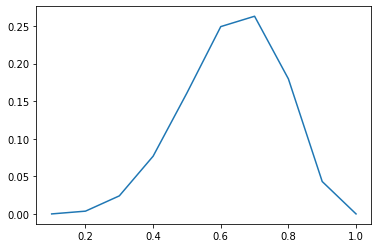

In [8]:
import matplotlib.pyplot as plt

plt.plot(hypotheses, posteriors)
plt.show()

This looks a lot better. We knew the earth was probably around 70% water. This plot places the majority of the posterior distribution in that area. In other words, the most likely hypothesis for how much water there is looks to be 70%, quickly followed by 60%. 

As an achievement of logical, this is really impressive. We estimated the surface area of water on the earth using only sampling and probability theory. No rulers involved. This is why people like Bayes theorem so much. It lets us estimate basically any quantity we want. All we need is a likelihood function (the binomial distribution) and a prior distribution over some range of hypotheses.